In [1]:
TRAIN_DATA_PATH = "/home/atari_ws/data/learning_jump_feasibility/train/data.npz"
TEST_DATA_PATH = "/home/atari_ws/esfal/data/learning_jump_feasibility/test/data.npz"

from data.dataset_supervised import DatasetFactory
from utils.config import Config
import cv2
import numpy as np
from matplotlib import pyplot as plt


cfg = Config("config/classifierBinary.yml")
# cfg = Config("config/regressorMLP.yml")
cfg.change_value("data_path", TRAIN_DATA_PATH)

data_cfg = {
    'binary': cfg.data['binary'],
    'noise_std': cfg.data['noise_std'],
    'exclude': cfg.data['exclude'],
    'data_path': cfg.data['data_path'],
    }

train_dataset = DatasetFactory.get("classifier", data_cfg)
# train_dataset = DatasetFactory.get("regressor", data_cfg)
print("Train dataset size: ", len(train_dataset))

data_cfg['data_path'] = TEST_DATA_PATH

test_dataset = DatasetFactory.get("classifier", data_cfg)
print("Test dataset size: ", len(test_dataset))

num_pos = 0
num_neg = 0

for i in range(len(train_dataset)):
    sample = train_dataset[i]
    if sample['target'] == 1:
        num_pos += 1
    else:
        num_neg += 1
        
print("percentage of positive samples: ", num_pos / len(train_dataset))
print("percentage of negative samples: ", num_neg / len(train_dataset))

num_pos = 0
num_neg = 0

for i in range(len(test_dataset)):
    sample = test_dataset[i]
    if sample['target'] == 1:
        num_pos += 1
    else:
        num_neg += 1

print("percentage of positive samples: ", num_pos / len(test_dataset))
print("percentage of negative samples: ", num_neg / len(test_dataset))


<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for boost::shared_ptr<hpp::fcl::CollisionGeometry> already registered; second conversion method ignored.


Train dataset size:  260725
Test dataset size:  23325
percentage of positive samples:  0.4410815993863266
percentage of negative samples:  0.5589184006136734
percentage of positive samples:  0.4417148981779207
percentage of negative samples:  0.5582851018220794


tensor([1.]) tensor(0.2191)


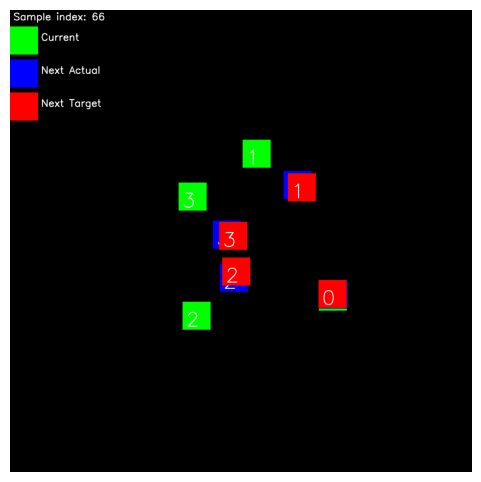

tensor([1.]) tensor(0.2540)


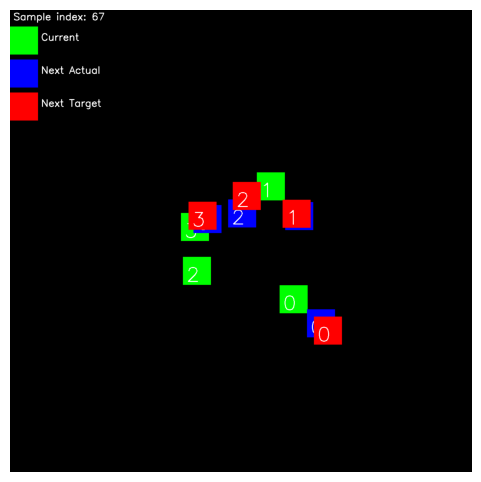

In [2]:
def plot_contact_loc(sample_idx):
    i = train_dataset.id_success[sample_idx]

    cur_contact_loc = train_dataset.feet_contact[i].numpy().reshape(4, 3)[:, 0:2]
    next_contact_loc = train_dataset.next_feet_contact[i].numpy().reshape(4, 3)[:, 0:2]
    target_contact_loc = train_dataset.target_contact[i].numpy().reshape(4, 3)[:, 0:2]

    label = train_dataset[sample_idx]['target']
    norm_dist = train_dataset[sample_idx]['norm_dist']
    print(label, norm_dist)

    contact_loc = (cur_contact_loc * 800).astype(np.int32)
    next_contact_loc = (next_contact_loc * 800).astype(np.int32)
    target_contact_loc = (target_contact_loc * 800).astype(np.int32)

    stone_size = int(0.06 * 1400)
    offset_x = 700
    offset_y = 700

    canvas = np.zeros((1400, 1400, 3), dtype=np.uint8)
    for i in range(4):
        x = contact_loc[i, 0]
        y = contact_loc[i, 1]

        x1, y1 = x-stone_size//2 + offset_x, y-stone_size//2 + offset_y
        x2, y2 = x+stone_size//2 + offset_x, y+stone_size//2 + offset_y

        cv2.rectangle(canvas, (x1, y1), (x2, y2), (0, 255, 0), -1)
        cv2.putText(canvas, str(i), (x1+10, y1+stone_size-10), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2)

        x_next = next_contact_loc[i, 0]
        y_next = next_contact_loc[i, 1]

        x1_next, y1_next = x_next-stone_size//2 + offset_x , y_next-stone_size//2 + offset_y
        x2_next, y2_next = x_next+stone_size//2 + offset_x , y_next+stone_size//2 + offset_y

        cv2.rectangle(canvas, (x1_next, y1_next), (x2_next, y2_next), (0, 0, 255), -1)
        cv2.putText(canvas, str(i), (x1_next+10, y1_next+stone_size-10), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2)

        x_cur = target_contact_loc[i, 0]
        y_cur = target_contact_loc[i, 1]

        x1_cur, y1_cur = x_cur-stone_size//2 + offset_x , y_cur-stone_size//2 + offset_y
        x2_cur, y2_cur = x_cur+stone_size//2 + offset_x , y_cur+stone_size//2 + offset_y

        cv2.rectangle(canvas, (x1_cur, y1_cur), (x2_cur, y2_cur), (255, 0, 0), -1)
        cv2.putText(canvas, str(i), (x1_cur+10, y1_cur+stone_size-10), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2)

    # add legend
    cv2.rectangle(canvas, (0, 50), (stone_size, 50 + stone_size), (0, 255, 0), -1)
    cv2.putText(canvas, "Current", (stone_size + 10, 50 + stone_size//2), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    cv2.rectangle(canvas, (0, 150), (stone_size, 150 + stone_size), (0, 0, 255), -1)
    cv2.putText(canvas, "Next Actual", (stone_size + 10, 150 + stone_size//2), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    cv2.rectangle(canvas, (0, 250), (stone_size, 250 + stone_size), (255, 0, 0), -1)
    cv2.putText(canvas, "Next Target", (stone_size + 10, 250 + stone_size//2), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # add sample index
    cv2.putText(canvas, f"Sample index: {sample_idx}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    return canvas

id = 66
canv = plot_contact_loc(id)
plt.figure(figsize=(6, 6))
plt.imshow(canv)
plt.axis('off')
plt.grid(False)
plt.show()

canv = plot_contact_loc(id+1)
plt.figure(figsize=(6, 6))
plt.imshow(canv)
plt.axis('off')
plt.grid(False)
plt.show()

In [3]:
import os
import glob
import torch
from models.MLP import MLP

state_path = "logs/MLPclassifierBinary/1/MLP.pth"

run_dir = os.path.split(state_path)[0]
config_path = glob.glob(run_dir + "/*.yaml") + glob.glob(run_dir + "/*.yml")
assert len(config_path) > 0, f"Config file not found in {run_dir}"
cfg = Config(config_path[0])

cfg_model = cfg.model["PARAMS"]

model = MLP(**cfg_model)
state = torch.load(state_path, map_location=torch.device('cpu'))
model.load_state_dict(state["state_dict"])
model.eval();

In [4]:
conf_dist_pos = []
conf_dist_neg = []

for id in range(int(len(test_dataset))):
    i = test_dataset.id_success[id]
    input = test_dataset[id]['input']
    input = input.unsqueeze(0)
    target = test_dataset[id]['target']
    
    with torch.no_grad():
        conf = model(input).squeeze()
        conf = torch.sigmoid(conf).item()
        
    dist = torch.norm(test_dataset.feet_contact[i] - test_dataset.target_contact[i], dim=-1).mean()

    if target == 0:
        conf_dist_neg.append((conf, dist))
    else:
        conf_dist_pos.append((conf, dist))
    

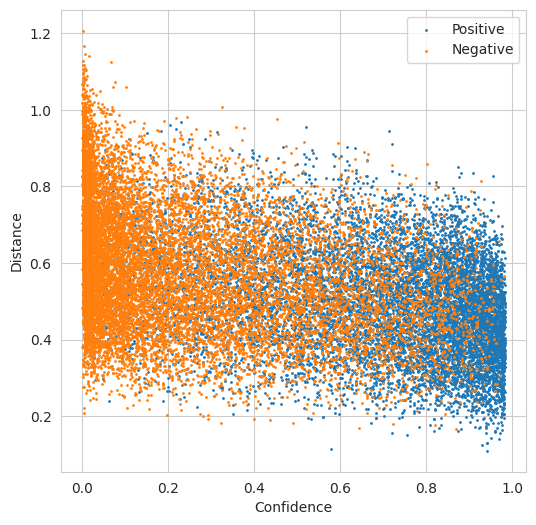

In [5]:
# sort by confidence
# conf_dist_pos.sort(key=lambda x: x[0])

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style="whitegrid")

conf_pos = [x[0] for x in conf_dist_pos]
dist_pos = [x[1] for x in conf_dist_pos]

conf_neg = [x[0] for x in conf_dist_neg]
dist_neg = [x[1] for x in conf_dist_neg]

plt.figure(figsize=(6, 6))
plt.scatter(conf_pos, dist_pos, s=1, label="Positive", c='tab:blue')
plt.scatter(conf_neg, dist_neg, s=1, label="Negative", c='tab:orange')
plt.xlabel("Confidence")
plt.ylabel("Distance")
plt.legend()
plt.show()


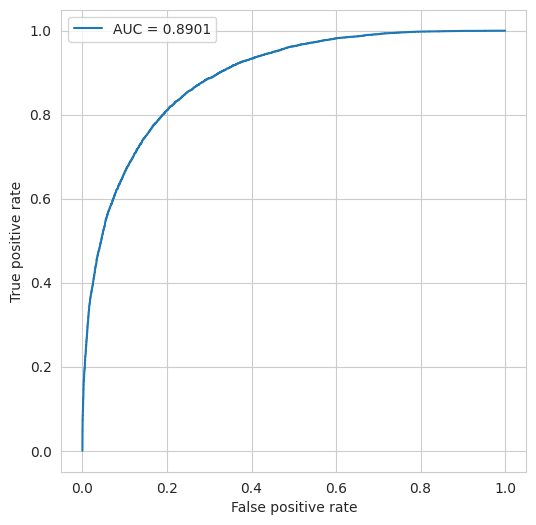

In [6]:
# PLot ROC curve and calculate AUC
from sklearn.metrics import roc_curve, roc_auc_score
import torch

y_true = []
y_score = []

for id in range(len(test_dataset)):
    i = test_dataset.id_success[id]
    input = test_dataset[id]['input']
    input = input.unsqueeze(0)
    target = test_dataset[id]['target']
    
    y_true.append(target)
    
    with torch.no_grad():
        conf = model(input).squeeze()
        conf = torch.sigmoid(conf).item()
        
    y_score.append(conf)

fpr, tpr, _ = roc_curve(y_true, y_score)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

auc = roc_auc_score(y_true, y_score)
plt.legend([f"AUC = {auc:.4f}"])

plt.show()


In [7]:
# compute accuracy with specific threshold
threshold = 0.6
y_pred = [1 if x > threshold else 0 for x in y_score]
y_true = [int(x) for x in y_true]

correct = 0
total = 0

for pred, true in zip(y_pred, y_true):
    if pred == true:
        correct += 1
    total += 1

accuracy = correct / total
print(f"Accuracy with threshold {threshold}: {accuracy:.4f}")

Accuracy with threshold 0.6: 0.7989


In [8]:
num_pos, num_neg = 0, 0
for i in range(len(train_dataset)):
    label = train_dataset[i]['target'][0]
    
    if label == 1:
        num_pos += 1
    elif label == 0:
        num_neg += 1
        
print("Positive: ", num_pos, ", Percentage: ", num_pos / (num_pos + num_neg) * 100, "%")
print("Negative: ", num_neg, ", Percentage: ", num_neg / (num_pos + num_neg) * 100, "%")

Positive:  115001 , Percentage:  44.10815993863266 %
Negative:  145724 , Percentage:  55.89184006136734 %
